In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA
from time import time
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler
sns.set()

In [119]:
def get_data():
    data_set = datasets.load_digits(n_class=10)
    data = data_set.data      
    label = data_set.target
    name_ = data_set.target_names       
    n_samples, n_features = data.shape      
    return data, label, name_, n_samples, n_features
    
X, y, target_names, n_samples, n_features = get_data()  

In [120]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

embeddings = {
    "t-SNE embeedding": TSNE(
        n_components=2,
        init="pca",
        random_state=0,
    ),
    "PCA embedding" : PCA(n_components=2, random_state=0)
}

In [121]:
def plot_embedding(X, title):

    _, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=100)
    
    X = MinMaxScaler().fit_transform(X)

    for name in target_names:
        ax.scatter(
            *X[y == name].T,
            marker = f"${name}$",
            s = 60,
            color = plt.cm.Dark2(name),
            alpha = 0.425,
            zorder = 2,
        )
    ax.set_title(title, fontsize=24)
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

Computing t-SNE embeedding...


c:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Computing PCA embedding...


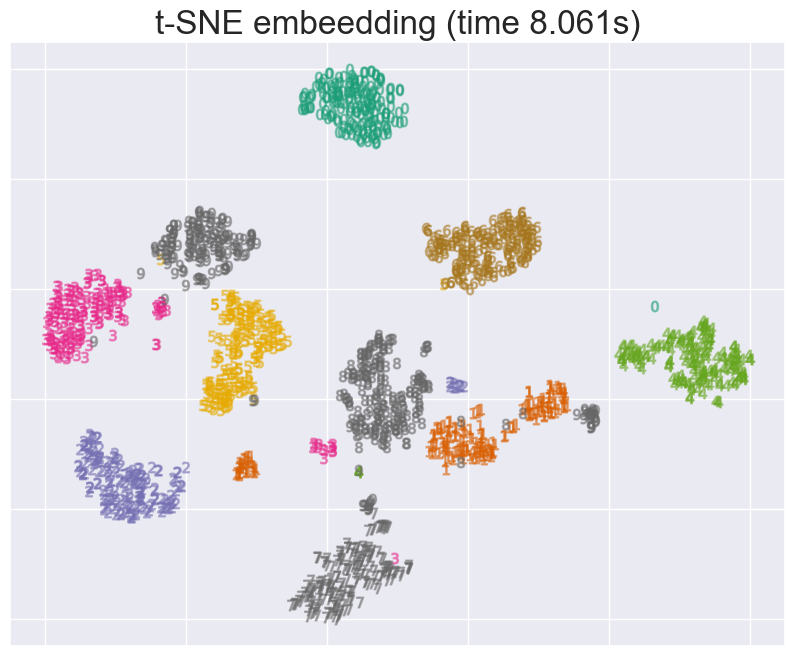

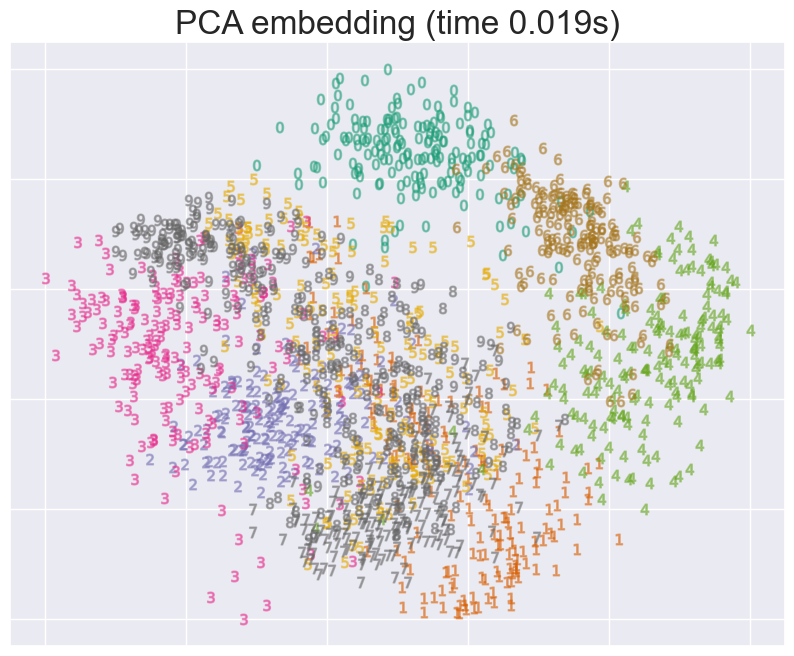

In [122]:
projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time
    
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)
plt.show()